# Popular data science questions

## Description

In this project we'll dive into the popular Q&A site [Data Science Stack Exchange (DSSE)](https://datascience.stackexchange.com/) to find out:

**¿What is it that people want to learn about in data science?**

### Exporing the site

DSSE is part of the Q&A sites network [Stack Exchange](https://stackexchange.com/), as any of the other sites in Stack Exchange is composed of only questions with answers.

The objective of the site is to answer questions about Data Science and Machine Learning from both professionals and learners in the field.

<img src="images/stack1.png">

The home page offers us with different ways of finding questions:
1. Tags
2. If they are popular right now, in the week or month
3. If they are unaswered.
4. If they are bountied.

Of those, the most interesting would be what are the tags that appear the most and what keywords are found **most often in popular questions**.

### ¿What a question looks like?

All questions display when it was asked, when it was it's last update, how many times it was seen and the upvotes/downvotes total

<img src="images/stack2.png">

Below the question we can also see the tags, the use who posted it and when was created and updated.

<img src="images/stack3.png">

Finally we see the answers to the question, with the most voted (an usually the accepted one) at the top.

<img src="images/stack4.png">

As part of the exploration process I posted a question that [can be found here](https://datascience.stackexchange.com/q/85707/107754).

## Retrieving data
First, to get a sense of what's going on in DSSE I wrote a query in [Stack Exchange Data Explorer](https://data.stackexchange.com/datascience/query/1344248/number-of-posts-by-tag) to find out what are the hottest tags. 

<img src="images/stack5.png">

Which gave the following results:

<img src="images/stack6.png">

Also looking at the **Posts** table we can see that _Tags_, _ViewCount_, _FavoriteCount_, _AnswerCount_, _CommentCount_ and _Score_ could have useful information for our investigation.

<img src="images/stack7.png">

## Popular questions
As mention above we'll focus on popular questions to determine Data Science interests in the comunnity.

# Reading data
We have a sample data in ```2020-2019-questions-csv``` with all the questions in DSSE from January 1, 2019 to Novemeber 15,  2020.

<img src="images/stack8.png">

In [1]:
# installing dependencies
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy

In [2]:
# importing dependencies
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
# reading data
tags = pd.read_csv("data-master/datascience-stackexchange/questions-by-tag.csv")

print(tags.info())

tags

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        597 non-null    int64 
 1   TagName   597 non-null    object
 2   numPosts  597 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 14.1+ KB
None


,id,TagName,numPosts
0,2,machine-learning,4231
1,46,python,2842
2,194,deep-learning,1928
3,81,neural-network,1653
4,324,keras,1380
...,...,...,...
592,977,generlized-advantaged-estimation,1
593,143,genetic,1
594,991,hmm,1
595,206,hog,1


In [4]:
# reading data
questions = pd.read_csv("data-master/datascience-stackexchange/2020-2019-questions.csv")

print(questions.info())
questions


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14061 entries, 0 to 14060
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     14061 non-null  int64  
 1   PostTypeId             14061 non-null  int64  
 2   AcceptedAnswerId       3933 non-null   float64
 3   ParentId               0 non-null      float64
 4   CreationDate           14061 non-null  object 
 5   DeletionDate           0 non-null      float64
 6   Score                  14061 non-null  int64  
 7   ViewCount              14061 non-null  int64  
 8   Body                   14061 non-null  object 
 9   OwnerUserId            13985 non-null  float64
 10  OwnerDisplayName       126 non-null    object 
 11  LastEditorUserId       5715 non-null   float64
 12  LastEditorDisplayName  24 non-null     object 
 13  LastEditDate           5738 non-null   object 
 14  LastActivityDate       14061 non-null  object 
 15  Ti

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,43363,1,NaN,NaN,2019-01-01 03:53:02,NaN,0,36,<p>I'm working on project that involves readin...,62929.0,...,NaN,2020-06-03 18:03:45,"How to detect when the ""bibliography"" of a pap...",<machine-learning><nlp>,1,0,NaN,NaN,NaN,CC BY-SA 4.0
1,43366,1,NaN,NaN,2019-01-01 06:02:07,NaN,3,55,<p>How does a given deep cnn model performance...,65157.0,...,NaN,2020-01-26 17:02:45,Performance of CNN based deep models with numb...,<deep-learning><convnet><image-classification>,1,0,1.0,NaN,NaN,CC BY-SA 4.0
2,43367,1,NaN,NaN,2019-01-01 06:16:26,NaN,0,24,"<p>Sorry if the title is a bit long, but basic...",65158.0,...,NaN,2020-09-26 08:02:00,Restricting a weight vector (optimization para...,<scikit-learn><tensorflow><scipy>,1,0,NaN,NaN,NaN,CC BY-SA 4.0
3,43370,1,NaN,NaN,2019-01-01 10:06:03,NaN,2,37,"<p>I have been building a model, can someone p...",65162.0,...,2019-01-01 10:33:04,2019-01-01 10:33:04,Is anything missing from my model evaluation p...,<classification>,0,5,NaN,NaN,NaN,CC BY-SA 4.0
4,43374,1,NaN,NaN,2019-01-01 13:18:02,NaN,3,38,<p>I am using a CNN for multivariate time seri...,6571.0,...,2019-06-01 11:47:15,2020-06-25 14:07:35,Adding more emphasis on most recent data in CNNs,<deep-learning><time-series><cnn><convolution>,1,0,NaN,NaN,NaN,CC BY-SA 4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14056,85428,1,NaN,NaN,2020-11-14 20:54:14,NaN,-1,13,"<p>After training my model, I realized that it...",107466.0,...,2020-11-14 22:46:58,2020-11-14 22:46:58,how can I prevent my model from overfitting?,<python><deep-learning><keras><cnn><image-prep...,1,0,NaN,NaN,NaN,CC BY-SA 4.0
14057,85432,1,NaN,NaN,2020-11-14 22:26:56,NaN,-1,13,<p>I want to enter in Data Science. I am still...,107468.0,...,NaN,2020-11-14 22:26:56,To enter in data science,<python>,0,2,NaN,NaN,NaN,CC BY-SA 4.0
14058,85433,1,NaN,NaN,2020-11-14 22:29:19,NaN,0,4,<p>Why do we use gradient descent on very non-...,107470.0,...,NaN,2020-11-14 22:29:19,Why use gradient descent on Deep Nets / RNNs w...,<neural-network><rnn><gradient-descent><optimi...,0,0,NaN,NaN,NaN,CC BY-SA 4.0
14059,85435,1,NaN,NaN,2020-11-15 00:17:00,NaN,0,5,<p>I have a multi-class classification problem...,74397.0,...,NaN,2020-11-15 00:17:00,What is the appropriate statistical significan...,<statistics><multiclass-classification>,0,0,NaN,NaN,NaN,CC BY-SA 4.0


Make sure that all posts are questions

In [5]:
print("Number of posts that aren't questions is: {}".format(len(questions[questions["PostTypeId"] != 1].index)))

Number of posts that aren't questions is: 0


Looks like there are NaN values in _FavoriteCount_

In [6]:
questions["FavoriteCount"].value_counts(dropna=False)

NaN     11702
1.0      1607
2.0       330
0.0       242
3.0        84
4.0        43
6.0        19
5.0        14
8.0         7
7.0         3
10.0        3
13.0        2
12.0        1
16.0        1
17.0        1
9.0         1
11.0        1
Name: FavoriteCount, dtype: int64

Let's fill them with zeroes as it makes a good proxy.

In [7]:
questions["FavoriteCount"].fillna(0, inplace=True)

In [8]:
questions["FavoriteCount"].value_counts(dropna=False)

0.0     11944
1.0      1607
2.0       330
3.0        84
4.0        43
6.0        19
5.0        14
8.0         7
10.0        3
7.0         3
13.0        2
11.0        1
9.0         1
17.0        1
16.0        1
12.0        1
Name: FavoriteCount, dtype: int64

Let's check now the other attributes

In [9]:
questions["Score"].value_counts(dropna=False)

 0     5489
 1     4680
 2     1952
 3      819
 4      348
-1      288
 5      159
 6       94
 7       51
 8       36
-2       33
 9       22
 10      18
-3       16
 13      10
 11       9
 14       8
 12       7
-4        4
 26       3
 20       2
 25       2
 16       2
 35       1
 18       1
 21       1
 33       1
 17       1
 37       1
 45       1
 22       1
 15       1
Name: Score, dtype: int64

There are a lot of different values for *ViewCount*

In [10]:
questions["ViewCount"].value_counts(dropna=False)

18      259
24      254
19      237
22      234
23      227
       ... 
5046      1
964       1
996       1
1004      1
2109      1
Name: ViewCount, Length: 1649, dtype: int64

Fortunately there a no rows with a NaN ViewCount value

In [11]:
print("Number of questions without views is: {}".format(len(questions[questions["ViewCount"] == None].index)))

Number of questions without views is: 0


In [12]:
questions["AnswerCount"].value_counts(dropna=False)

1     6769
0     4696
2     1992
3      447
4      111
5       29
7        7
6        7
10       1
9        1
8        1
Name: AnswerCount, dtype: int64

# Processing tags
As seen the tags have as constant pattern which makes it easy to process them.

First we'll format them to comma separated values.

In [13]:
questions["Tags"].head()

0                           <machine-learning><nlp>
1    <deep-learning><convnet><image-classification>
2                 <scikit-learn><tensorflow><scipy>
3                                  <classification>
4    <deep-learning><time-series><cnn><convolution>
Name: Tags, dtype: object

In [14]:
questions["OldTags"] = questions["Tags"]

In [15]:
questions["Tags"] = questions["OldTags"].str.replace("><", ",").str.replace("<|>", "").str.split(',')
questions["Tags"].head()

0                           [machine-learning, nlp]
1    [deep-learning, convnet, image-classification]
2                 [scikit-learn, tensorflow, scipy]
3                                  [classification]
4    [deep-learning, time-series, cnn, convolution]
Name: Tags, dtype: object

Now that we have cleaned the tags let's find out how many times the tags were viewed.

In [16]:
tags_count = {
    
}

for index, question in questions.iterrows():
    for tag_name in question["Tags"]:
        if tag_name in tags_count: 
            tags_count[tag_name] += question["ViewCount"]
        else: 
            tags_count[tag_name] = question["ViewCount"]
            
tags["ViewCount"] = tags["TagName"].apply(lambda tag_name:  tags_count[tag_name])

Now tha we have calculated the views for each tag we will have to check the top 10 tags and boy would it be nice that the top viewed 10 and top 10 posted are the same!

In [17]:
top_viewed_tags = tags.sort_values("ViewCount", ascending=False).head(10)
top_posted_tags = tags.sort_values("numPosts", ascending=False).head(10)
print("Top posts tags")
print(top_posted_tags)
print("----------------------------------------------")
print("Top viewed tags")
print(top_viewed_tags)


Top posts tags
    id           TagName  numPosts  ViewCount
0    2  machine-learning      4231    1195463
1   46            python      2842    1748039
2  194     deep-learning      1928     664294
3   81    neural-network      1653     554442
4  324             keras      1380     791543
5   77    classification      1174     327949
6  321        tensorflow       967     408137
7  128      scikit-learn       910     430903
8   47               nlp       867     252568
9  557               cnn       729     232480
----------------------------------------------
Top viewed tags
     id           TagName  numPosts  ViewCount
1    46            python      2842    1748039
0     2  machine-learning      4231    1195463
4   324             keras      1380     791543
13   64            pandas       581     783682
2   194     deep-learning      1928     664294
3    81    neural-network      1653     554442
7   128      scikit-learn       910     430903
6   321        tensorflow       967     

Unfortunately is not an exact match so we'll make a separate analysis for both number of posts and views and try to merge these two afterwards.

In [18]:
def plot_tags(df, column, title):
    fig, ax = plt.subplots(figsize=(10, 4))
    
    labels = df["TagName"]
    values = df[column]
    ax.bar(labels, values, color="#b2abd2")

    mean = values.mean()
    mean_line = ax.axhline(mean, color="#5e3c99", linestyle="--" )
    
    median = values.median()
    median_line = ax.axhline(median, color="#e66101", linestyle="--" )

    ax.legend((mean_line, median_line), ("mean", "median"))

    ax.set_xlabel("TagName")
    ax.set_ylabel(column)
    ax.set_title(title)
    ax.tick_params(axis="x", rotation=55)

    plt.show()

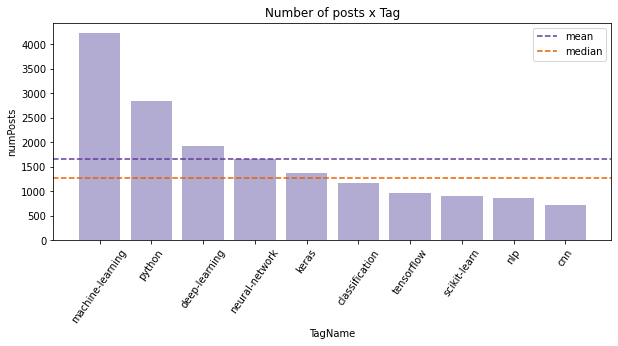

In [19]:
plot_tags(top_posted_tags, "numPosts", "Number of posts x Tag" )

The number of posts are heaviliy skewed by *machine-learning* and *python* which are very popular in terms of questions asked. The notable distance between mean and median confirms that the heavy interest in those two tags has a heavy impact on the popularity distribution.

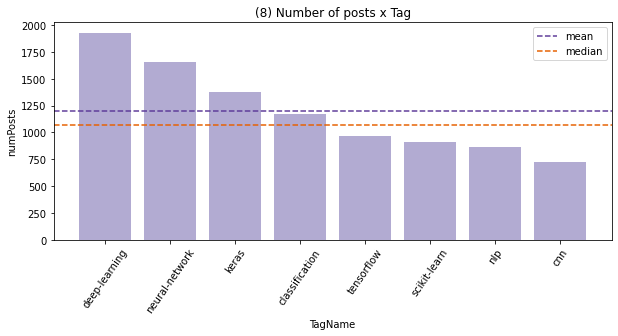

In [20]:
plot_tags(top_posted_tags.tail(8), "numPosts", "(8) Number of posts x Tag" )

Reviewing the plot without the first two values we can see a more equally distributed series of values. The distance between mean and median shortens a lot.

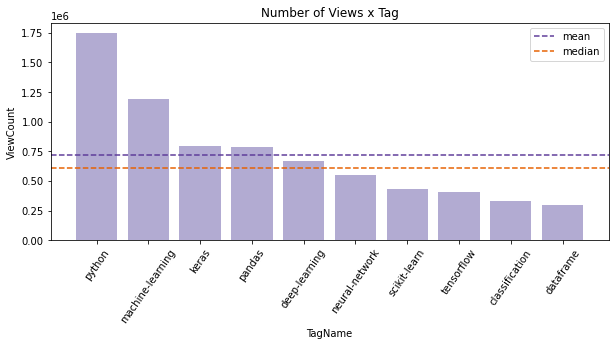

In [21]:
plot_tags(top_viewed_tags, "ViewCount", "Number of Views x Tag" )

As seen in the *Number of posts x Tag* both *python* and *machine-learning* are at the top of the public interest in a very impressive way.

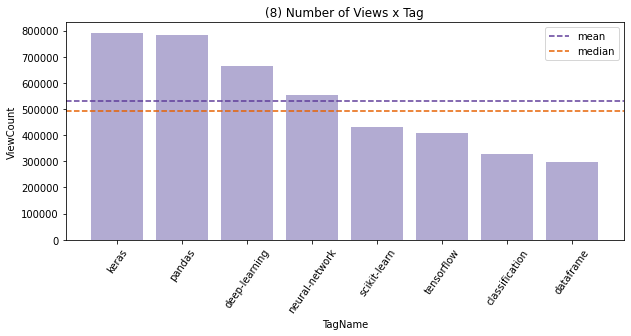

In [22]:
plot_tags(top_viewed_tags.tail(8), "ViewCount", "(8) Number of Views x Tag" )

Following the example we can see that the remaining 8 tags have a more equitative distrbution.

Text(0.5, 1.0, 'Tags numPosts x ViewCount')

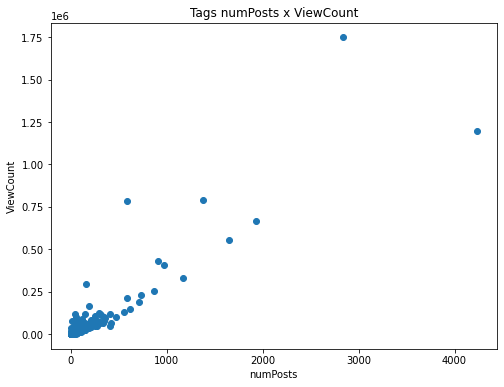

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(tags["numPosts"], tags["ViewCount"])

ax.set_xlabel("numPosts")
ax.set_ylabel("ViewCount")
ax.set_title("Tags numPosts x ViewCount")

Overall we can see a predictable positive correlation between number of posts and number of views.

In [71]:
def plot_corr(corr_matrix, title, figsize=(8, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(corr_matrix, cmap="PRGn")

    ax.set_xticks(np.arange(len(corr_matrix.columns)))
    ax.set_yticks(np.arange(len(corr_matrix.index)))
    ax.set_xticklabels(corr_matrix.columns)
    ax.set_yticklabels(corr_matrix.index)
    ax.set_title(title)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    
    for i in range(corr_matrix.shape[0]):
        for j in range(corr_matrix.shape[1]):
            corr_value = corr_matrix.iloc[i,j]
            ax.text(i, j, round(corr_value, 2), ha="center", va="center", color="w")

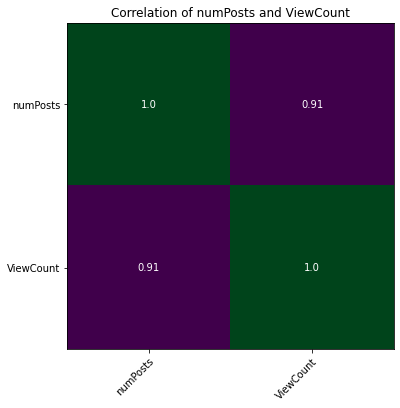

In [72]:
tags_corr = tags[["numPosts", "ViewCount"]].corr()
plot_corr(tags_corr, "Correlation of numPosts and ViewCount")

## Tags correlation
Now that we have found the most posted and viewed tags let's search for correlations between tags.

In [45]:
top_tags = top_posted_tags.merge(top_viewed_tags, how="outer", on=["id", "TagName", "numPosts", "ViewCount"] ) 

top_tags

,id,TagName,numPosts,ViewCount
0,2,machine-learning,4231,1195463
1,46,python,2842,1748039
2,194,deep-learning,1928,664294
3,81,neural-network,1653,554442
4,324,keras,1380,791543
5,77,classification,1174,327949
6,321,tensorflow,967,408137
7,128,scikit-learn,910,430903
8,47,nlp,867,252568
9,557,cnn,729,232480


Merge top views and posted tags to give a smaller scope to the analysis.

Then add a each tag as a column in questions.

In [27]:
for tag_name in top_tags["TagName"]:
    questions[tag_name] = questions["Tags"].apply(lambda tags: 1 if tag_name in tags else 0)

Define questions columns of interest to perform numerical analysis.

In [28]:
tags_cols = top_tags["TagName"].to_list()
num_cols = ["FavoriteCount", "ViewCount","AnswerCount", "CommentCount", "Score"]

In [46]:
tagged_questions = questions[num_cols + tags_cols]
tagged_questions

,FavoriteCount,ViewCount,AnswerCount,CommentCount,Score,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,pandas,dataframe
0,0.0,36,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1.0,55,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0
2,0.0,24,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0.0,37,0,5,2,0,0,0,0,0,1,0,0,0,0,0,0
4,0.0,38,1,0,3,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14056,0.0,13,1,0,-1,0,1,1,0,1,0,0,0,0,1,0,0
14057,0.0,13,0,2,-1,0,1,0,0,0,0,0,0,0,0,0,0
14058,0.0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14059,0.0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
def plot_tags_corr(df, cols, title):
    ''' Compute and plot a correlation of tags''' 
    df_corr = df[cols].corr()
    plot_corr(df_corr, title, figsize=(20, 10))

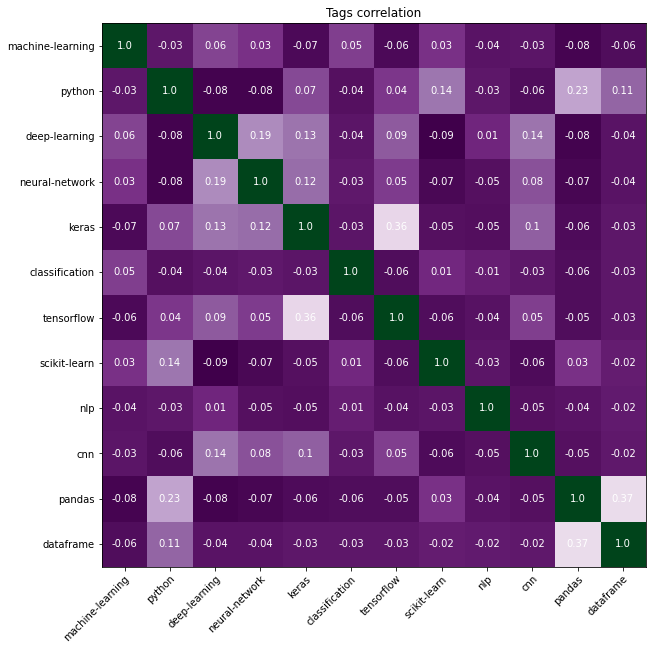

In [167]:
plot_tags_corr(tagged_questions[tags_cols], tags_cols, "Tags correlation")

The highest correlations were found between ```pandas``` and ```dataframe```,  ```keras``` and ```tensorflow``` and ```pandas``` and ```python```.

In [172]:
pandas_dataframe = tagged_questions[(tagged_questions["pandas"] == 1) | (tagged_questions["dataframe"] == 1) ]
pandas_dataframe_corr = pandas_dataframe[["pandas", "dataframe"]].corr()
pandas_dataframe_corr.min()

pandas      -0.450689
dataframe   -0.450689
dtype: float64

If we only consider questions where is ```pandas``` or ```dataframe``` are present, the correlation auments.

In [173]:
keras_tensorflow = tagged_questions[(tagged_questions["keras"] == 1) | (tagged_questions["tensorflow"] == 1) ]
keras_tensorflow_corr = keras_tensorflow[["keras", "tensorflow"]].corr()
keras_tensorflow_corr.min()

keras        -0.581259
tensorflow   -0.581259
dtype: float64

In [174]:
pandas_python = tagged_questions[(tagged_questions["pandas"] == 1) | (tagged_questions["python"] == 1) ]
pandas_python_corr = pandas_python[["pandas", "python"]].corr()
pandas_python_corr.min()

pandas   -0.545972
python   -0.545972
dtype: float64

Same happens for the rest of the tags.